<a href="https://colab.research.google.com/github/malaksobhi8/Clustering/blob/main/DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Define quartiles for 'Annual Income (k$)'
quartiles = [0, 41.5, 61.5, 78, 137]

# Labels for income ranges
labels = ['<$41.5k', '$41.5k-$61.5k', '$61.5k-$78k', '>$78k']

# Create 'Income Range' column based on quartiles
data['Income Range'] = pd.cut(data['Annual Income (k$)'], bins=quartiles, labels=labels)

# Group by 'Gender' and 'Income Range', and count occurrences
income_range_counts = data.groupby(['Gender', 'Income Range']).size()

# Print the result
print(income_range_counts)

Gender  Income Range 
Female  <$41.5k          32
        $41.5k-$61.5k    27
        $61.5k-$78k      32
        >$78k            21
Male    <$41.5k          18
        $41.5k-$61.5k    23
        $61.5k-$78k      28
        >$78k            19
dtype: int64


<ipython-input-12-ed443a2ca184>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


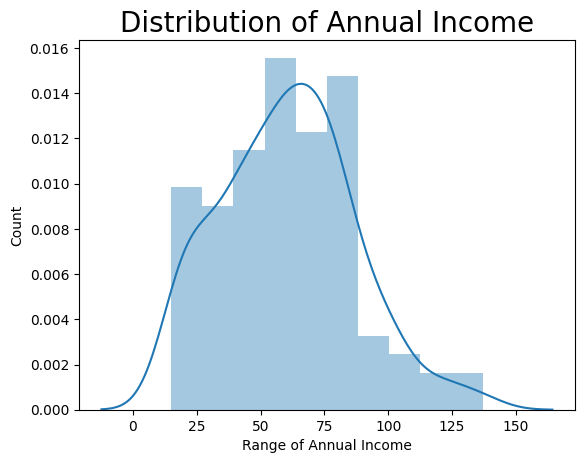

In [ ]:
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

<ipython-input-13-31ef81cdb8c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


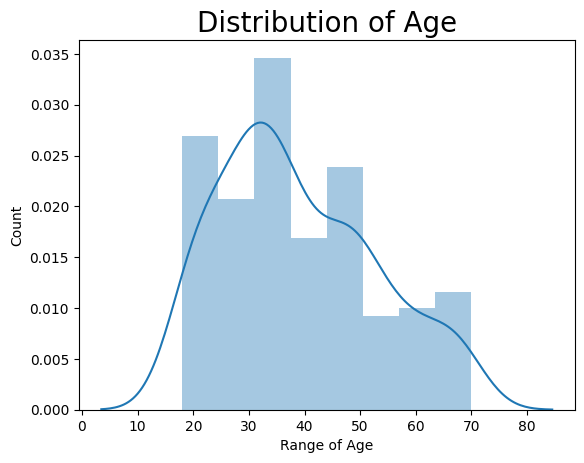

In [ ]:
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

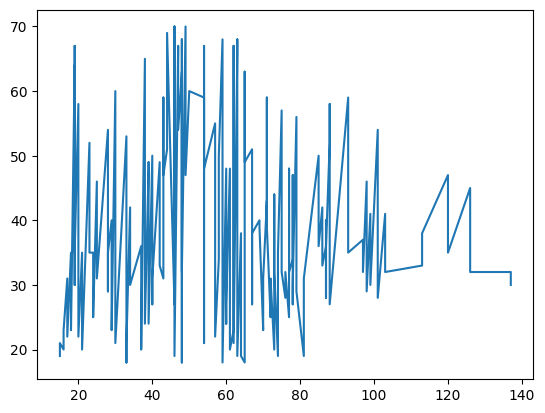

In [ ]:
x = data['Annual Income (k$)']
y = data['Age']

plt.plot(x, y)

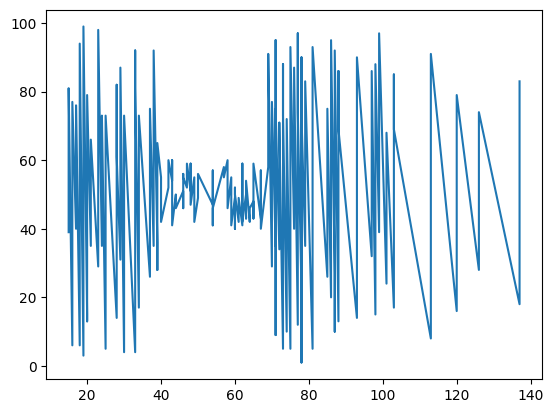

In [ ]:
x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']

plt.plot(x, y)

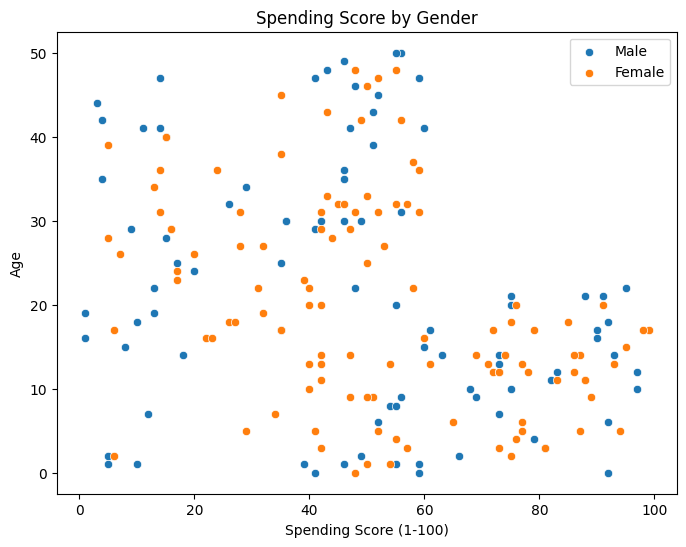

In [ ]:
label_encoder = LabelEncoder()
data['Age'] = label_encoder.fit_transform(data['Age'].astype(str))
male = data[data['Gender'] == 'Male']
female = data[data['Gender'] == 'Female']
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Spending Score (1-100)", y="Age", data=male, label='Male')
sns.scatterplot(x="Spending Score (1-100)", y="Age", data=female, label='Female')
plt.title('Spending Score by Geaqnder')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
# Function to calculate Hopkins statistic
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
# Compute Hopkins statistic
hopkins_statistic = hopkins(data[['Annual Income (k$)', 'Spending Score (1-100)']])
print("Hopkins Statistic:", hopkins_statistic)
#Hopkins Statistic Calculation:
#The hopkins() function calculates the Hopkins statistic, which measures the cluster tendency of the dataset.
# A value close to 1 suggests high cluster tendency.

Hopkins Statistic: 0.7334927617985153


#The output:    
#Hopkins Statistic: 0.8000357686324077
a Hopkins statistic of approximately 0.80 indicates that the dataset has a strong tendency to form clusters based on the  #features used for clustering (Annual Income and Spending Score). This implies that the data points are not uniformly distributed
across the feature space but rather tend to be closer to other points within the same cluster and farther away from poits in other
clusters.

In [ ]:
# K-Medoids clustering
kmedoids = KMedoids(n_clusters=5, random_state=0)
data['KMedoids_Clusters'] = kmedoids.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])

NameError: name 'KMedoids' is not defined

In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
data['DBSCAN_Clusters'] = dbscan.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

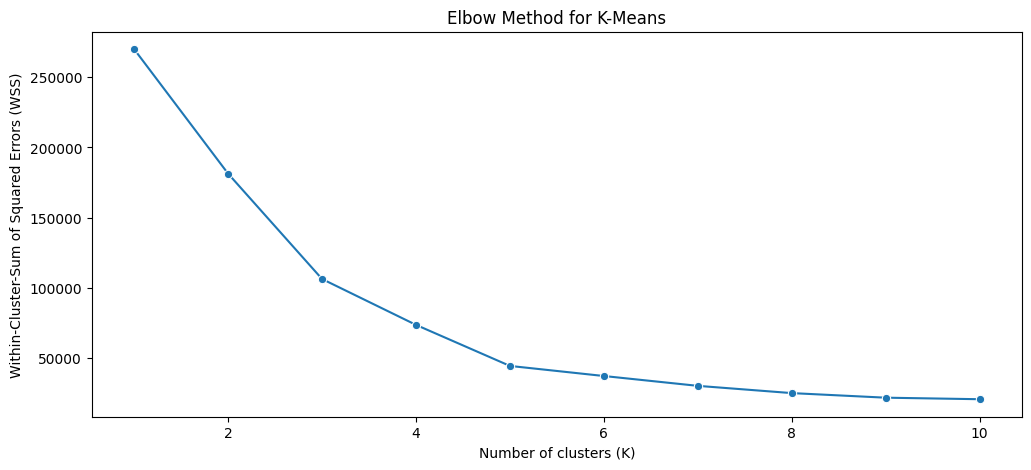

In [ ]:
# Elbow Method for K-Means
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
wss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(12, 5))
sns.lineplot(x=K, y=wss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.show()

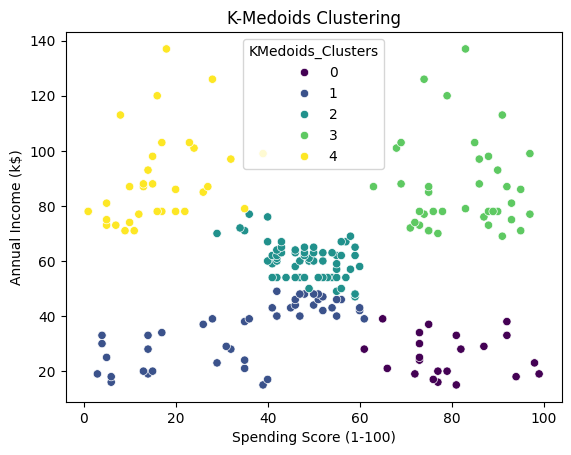

In [ ]:
# Plotting K-Medoids clusters
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue='KMedoids_Clusters', data=data, palette='viridis')
plt.title('K-Medoids Clustering')
plt.show()

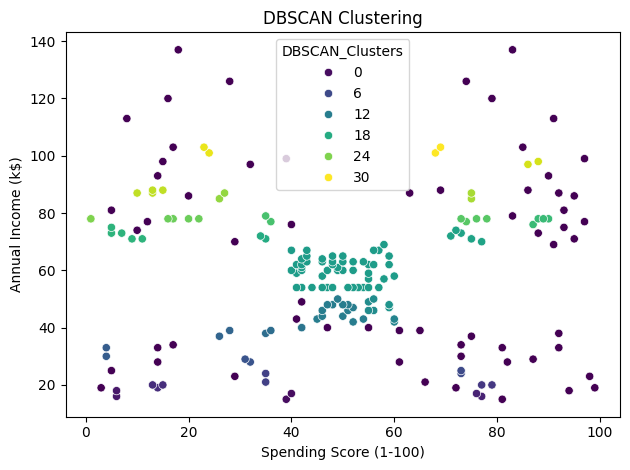

In [ ]:
# Plotting DBSCAN clusters
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue='DBSCAN_Clusters', data=data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.show()

In [ ]:
# Compute silhouette score for KMedoids clustering
silhouette_kmedoids = silhouette_score(X, data['KMedoids_Clusters'])
print("Silhouette Score for K-Medoids Clustering:", silhouette_kmedoids)

# Compute silhouette score for DBSCAN clustering
silhouette_dbscan = silhouette_score(X, data['DBSCAN_Clusters'])
print("Silhouette Score for DBSCAN Clustering:", silhouette_dbscan)

Silhouette Score for K-Medoids Clustering: 0.4468315848864226
Silhouette Score for DBSCAN Clustering: 0.06815381140609145


explaining the two outputs:
In summary, the silhouette scores indicate that the K-Medoids clustering has produced clusters that are more well-defined
and separated compared to the DBSCAN clustering. However, further analysis and parameter tuning may be necessary,
especially for the DBSCAN clustering, to improve the clustering quality.
#Silhouette Score for K-Medoids Clustering: 0.4468315848864226
#Silhouette Score for DBSCAN Clustering: 0.06815381140609145